In [6]:
# 무한 스크롤링 예제

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from collections import Counter

# 웹 드라이버 설정 (Chrome 예제)
driver = webdriver.Chrome()

# 웹페이지 열기
driver.get('https://www.jumpit.co.kr/positions?jobCategory=19&sort=rsp_rate')

# 새로운 iFMgIl 클래스 명을 가진 요소가 나타나는지 확인하면서 스크롤하는 함수
def scroll_until_no_new_elements(driver, class_name):
    prev_elements_count = 0
    
    while True:
        # 현재 페이지의 요소들 가져오기
        current_elements = driver.find_elements(By.CLASS_NAME, class_name)
        current_elements_count = len(current_elements)
        
        # 새로운 요소가 나타나지 않으면 스크롤 중지
        if current_elements_count == prev_elements_count:
            print("더 이상 새로운 요소가 나타나지 않음, 스크롤 중지")
            break

        # 이전 요소 개수 갱신
        prev_elements_count = current_elements_count

        # 페이지 스크롤 (End 키를 눌러 스크롤 다운)
        driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
        
        # 페이지 로드 대기
        time.sleep(3) # 페이지 로딩 시간을 고려하여 적절히 조정

# iFMgIl 클래스를 가진 요소들을 확인
scroll_until_no_new_elements(driver, 'iFMgIl')

# 모든 요소의 텍스트를 수집
elements = driver.find_elements(By.CLASS_NAME, 'iFMgIl')
texts = [elem.text for elem in elements]

# 동일한 이름끼리 묶어서 숫자 세기
counter = Counter(texts)

# 데이터 프레임 생성
df = pd.DataFrame(counter.items(), columns=['Name', 'Count'])

# CSV 파일로 저장
df.to_csv('jumpit_crawling.csv', index=False)

# 드라이버 종료
driver.quit()

print("크롤링 완료 및 jumpit_crawling.csv 파일 저장")


더 이상 새로운 요소가 나타나지 않음, 스크롤 중지
크롤링 완료 및 jumpit_crawling.csv 파일 저장


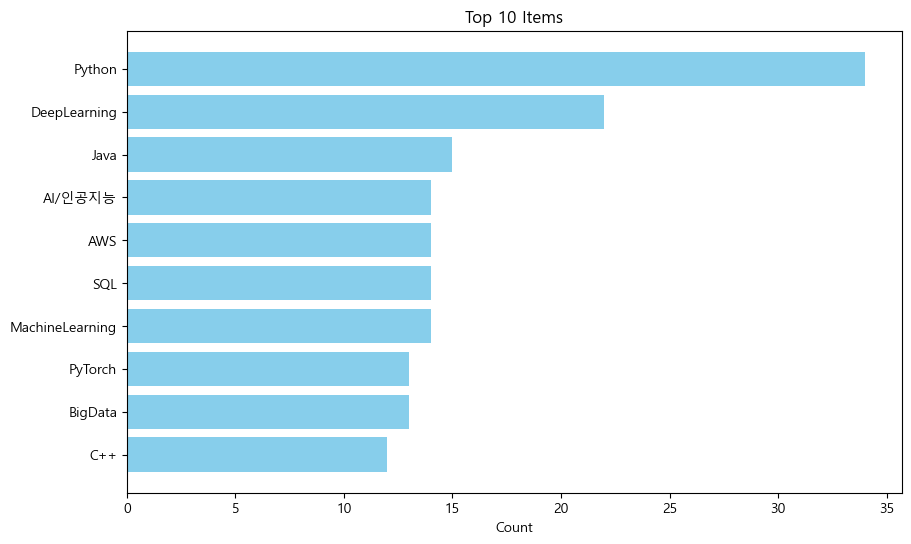

In [10]:
# 시각화

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

df_processed = pd.read_csv('jumpit_crawling_processed.csv')

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False


# 상위 10개의 항목 추출
top_10_items = df_processed.nlargest(10, 'Count')

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_10_items['Name'], top_10_items['Count'], color='skyblue')
plt.xlabel('Count')
plt.title('Top 10 Items')
plt.gca().invert_yaxis()  # 항목들을 상위에 오도록 반전

# 그래프 보여주기
plt.show()